# Chapter 5: Binary Classifications

Binary classification is one of most important and most common types of machine learning. Examples of binary classifications include whether an email is a spam, whether a credit card transaction is fraudulent, whether a customer will buy a certain product or not...

In this chapter, you'll learn to classify images into two classes: a horse or a deer. You'll build a simple neural network from scratch for the task. You'll see how the weights and the predictions change as the training progresses. In the early stages of training, if you feed a picture of a horse into the model, the predicted probability is about 35%. After training, the predicted probability is more than 88%. In the early stages of training, if you feed a picture of a deer into the model, the predicted probability of it being a deer is around 60%. After training, the predicted probability is 94%. You can also see how predicted probabilities change as the training progresses, as in this animation:
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_horse_deer.gif" />

***
$\mathbf{\text{Create a subfolder for files in Chapter 5}}$<br>
***
We'll put all files for Chapter 5 in a subfolder /files/ch05. The code in the cell below does that.
***

In [1]:
import os

os.makedirs("files/ch05", exist_ok=True)


Before you start, install the ***sklearn*** library by first activating the virtual environment ***animatedML***. Enter the following command in the Anaconda prompt or a terminal:

`pip install sklearn`

or simply run the following in a new cell in this Jupyter Notebook.

`!pip install sklearn`

## 1. What Is A Binary Classification Problem
When the target label is binary with two possible values (such as 0 or 1, yes or no), we call the machine learning model a binary classification problem. This is very common in the real-world, ranging from credit card fraud prediction, two-class image classification, to disease detection.  

### 1.1. Use the Sigmoid Activation Function in Binary Classifications
When the target label is binary with values of either 0 or 1, we can use the sigmoid activation function to squash the output from the range $[-\infty, \infty]$ to the range $[0,1]$, which can be interpreted as the probability of the target being class 1. 

The idea can be illustrated in the graph below. Here we assume a linear relationship between the input and the output before activation. This can be achieved by either a traditional Logistic regression or a neural network with no hidden layer and sigmoid activation. 

The cell below draws the diagram for the neural network that we use for a binary classification problem. 

(-6.0, 6.0, -3.0, 3.0)

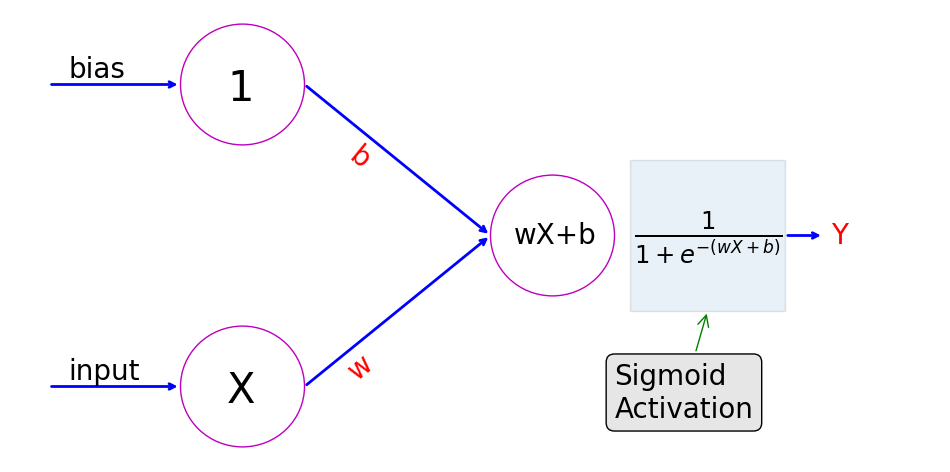

In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

fig = plt.figure(figsize=(12,6), dpi=100)
ax = fig.add_subplot(111)

# Draw the two input neurons
circle = plt.Circle((-3,2),radius=0.8, color='white',ec="m")
ax.add_artist(circle)
circle = plt.Circle((-3,-2),radius=0.8, color='white',ec="m")
ax.add_artist(circle)
# Draw the output neuron
circle = plt.Circle((1,0),radius=0.8, color='white',ec="m")
ax.add_artist(circle)

# Draw connections between neurons
ax.annotate("",xy = (0.2,0), 
                   xytext = (-2.2,2), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))
ax.annotate("",xy = (0.2,0), 
                   xytext = (-2.2,-2), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))
ax.annotate("",xy = (-3.8,-2), 
                   xytext = (-5.5,-2), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))
ax.annotate("",xy = (-3.8,2), 
                   xytext = (-5.5,2), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))
ax.annotate("",xy = (4.5,0), 
                   xytext = (4,0), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))

# Put explanation texts on the graph
plt.text(-5.25, 2.1, "bias", fontsize=20, color="k")
plt.text(-5.25, -1.9, "input", fontsize=20, color="k")
#plt.text(2, 0.1, "output", fontsize=20, color="k")
plt.text(-1.7, -1.9, f"w", fontsize=20, 
         color="r",rotation=39)
plt.text(-1.7, 0.9, f"b", fontsize=20,
         color="r",rotation=-39)
plt.text(-3.2, 1.8, "1", fontsize=30, color="k")
plt.text(-3.2, -2.2, "X", fontsize=30, color="k")
plt.text(0.5, -0.1, "wX+b", fontsize=20, color="k")
plt.text(4.6, -0.1, f"Y", fontsize=20, color="r")
plt.text(2.05, -0.1, r"$\frac{1}{1+e^{-(wX+b)}}$", fontsize=25, color="k")

# add text to explain 
txt = ax.annotate('Sigmoid\nActivation', 
                   xy = (3,-1), 
                   xytext = (0.65,0.1), 
                   textcoords = 'axes fraction', 
                   bbox = dict(boxstyle="round", fc="0.9"), 
                   arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1), 
                   fontsize = 20)
# add rectangle to plot
ax.add_patch(Rectangle((2,-1), 2, 2,
             edgecolor = 'k',alpha=0.1))

ax.set_xlim(-6, 6)
ax.set_ylim(-3, 3)
#plt.grid()
plt.axis("off")

### 1.2. Which Loss Function to Use in Binary Classifications
***
$\mathbf{\text{What is the binary cross-entropy loss function?}}$<br>
***
In binary classification problems, the preferred loss function is the binary cross-entropy function, which measures the average difference between the predicted probabilities and the actual labels (1 or 0). If a model makes a perfect prediction and assigns a 100% probability to all observations labeled 1 and a 0% probability to all observations labeled 0, the binary cross-entropy loss function will have a value of 0. 

Mathematically, the binary class-entropy loss function is defined as 
$$BinaryCrossEntropy= \sum_{n=1} ^{N} -[Y_n\times log(\hat{Y}_n) + (1-Y_n)\times log(1-\hat{Y}_n)]$$
where $\hat{Y}_n$ is the estimated probability of observation n being class 1, and $Y_n$ is the actual label of observation n (which is either 0 or 1).
***

## 2. Process Image Data
You’ll use the CIFAR-10 dataset to learn how to make binary and multiple classification predictions in this book. Note that ***tensorflow*** now has included the dataset in its standard dataset so you can load them directly from the ***tensorflow*** library. In the Appendix at the end of this chapter, I'll show you how to do that.

However, it’s a good idea to learn how to download the dataset in a zip format from the origin, process it, and visualize it. You’ll pick up valuable skills in data science libraries such as ***numpy***, ***matplotlib*** and others. 


Let’s go to Alex Krizhevsky's home page at University of Toronto https://www.cs.toronto.edu/~kriz/cifar.html to have a look at the dataset. The dataset CIFAR-10 provides 60,000 images in ten different classes: 
* planes
* cars
* birds
* cats 
* deer
* dogs
* frogs
* horses
* ship
* trucks 


You can manually download the data from the website and unzip it. But we’ll use Python to do all these so you’ll learn how to handle similar problems in the future. 

### 2.1. Download Data
You can use code below to download the data, unzip it, and save on your computer.

In [2]:
import requests
import tarfile

# Use the requests library to fetch the file from the URL
url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
file = requests.get(url)

# Download the file content
with open('files/cifar-10-python.tar.gz','wb') as f:
    f.write(file.content)

# Unzip it and save it in the subfolder /cifar10   
cifar = tarfile.open('files/cifar-10-python.tar.gz')
cifar.extractall('files/cifar10') 
cifar.close()

We go to the data url and use the ***requests*** library to download the data to your /files folder. 
Once done, we use the ***tarfile*** library to unzip the file and save it in the subfolder /files/cifar10. 

Both ***requests*** and ***tarfile*** are in the Python Standard Library, so no installation is needed.  
If you go to the subfolder /files/cifar10/cifar-10-batches-py/, you will see 8 files there.

### 2.2. Convert numpy Arrays to Pictures and Back
Next, you’ll learn how to convert a bunch of integers such as 0, 2, 144, or 255 into pictures that you can see on your computer. In the process, you'll understand how the RGB system works to create color images.  You can also convert a picture back into a bunch of numbers.



there are 1005 pictures of label 0
there are 974 pictures of label 1
there are 1032 pictures of label 2
there are 1016 pictures of label 3
there are 999 pictures of label 4
there are 937 pictures of label 5
there are 1030 pictures of label 6
there are 1001 pictures of label 7
there are 1025 pictures of label 8
there are 981 pictures of label 9
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


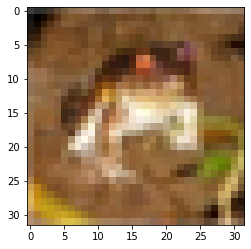

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# The unpickle function from Alex Krizhevsky's home page 
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# We'll use only one batch to speed up training for the moment
batch1 = unpickle("cifar10/cifar-10-batches-py/data_batch_1")

# Must put b in front of the keys since they are bits literal
data = batch1[b"data"]
labels = batch1[b'labels']

for i in range(10):
    num = labels.count(i)
    print(f"there are {num} pictures of label {i}")

X = data.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
y = np.array(labels)
        
# See the first picture
X0 = X[0]
print(X0)
plt.imshow(X0)
plt.show()        

The CIFAR-10 data we just downloaded are organized in five batches of training data and one batch of test data, plus a file of meta data and a ReadMe file. We open only the first batch for the moment to save time.

Each batch contains both the data (X) and labels (y). Each batch has 1000 pictures. The Xs are in the shape of 3 by 32 by 32. There are three color channels, and each picture has a resolution of 32 by 32.

The data is in a channel-first format, so we have switched the position of the 2nd and the fourth axis in the original data by using the transpose() method in numpy.

The labels are from 0 to 9, with roughly 1000 of each.
We print out the first picture, and it’s a numpy array with numbers ranging from 0 to 255. 
We can use the imshow() method in the matplotlib library to show the picture, and it’s shown as a frog. 

### 2.3. Match Pictures with Labels
Next, you’ll convert the numbers in the CIFAR-10 dataset to object names and match them with the pictures. 

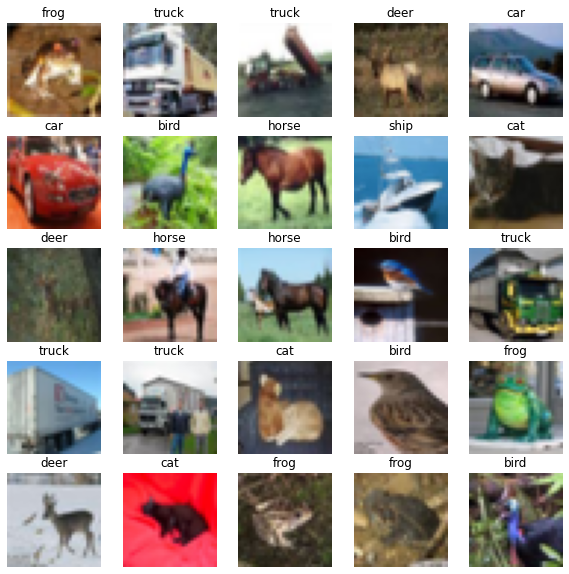

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle("files/cifar10/cifar-10-batches-py/data_batch_1")

# Must put b in front of the keys since they are bits literal
data = batch1[b"data"]
labels = batch1[b'labels']   

X = data.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
y = np.array(labels)
 
names = ['plane', 'car', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']    

plt.figure(figsize=(10,10))
for i in range(5):
    for j in range(5):
        plt.subplot(5,5, 5*i+j+1)
        plt.imshow(X[5*i+j])
        plt.axis('off')
        plt.title(names[y[5*i+j]], fontsize=12)
plt.subplots_adjust(hspace=0.20)

plt.show()  

Here we use the *axis(‘off’)* option to turn off the axis so you only see the pictures. The *subplot()* method puts the 25 pictures in a 5 by 5 matrix. We extract the name of each picture, and put it as the title of the picture, so you can see it on top of each picture here.

## 3. Binary Classification with A Logit Regression
In this section, we'll use a traditional logistic regression to classify images into horses and deer. 

### 3.1. Prepare the Data
A color picture uses three channels, the RGB system. The first channel represents color red, the second green, and the third blue. Below, you'll separate out the three channels and see them one by one. 

In [6]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl


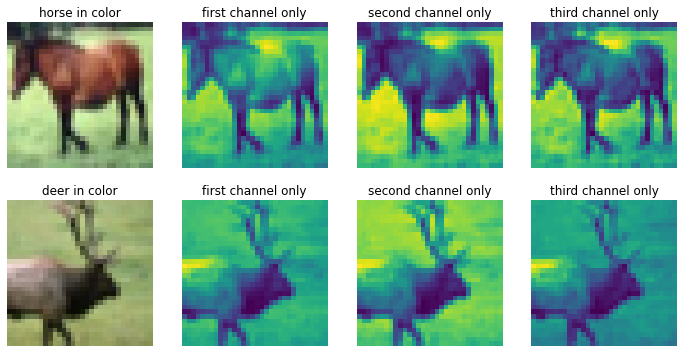

In [7]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle("files/cifar10/cifar-10-batches-py/data_batch_1")

# Must put b in front of the keys since they are bits literal
data = batch1[b"data"]
labels = batch1[b'labels']

# Keep deer and horses only
# Change y to a dummy of 1 (horse) or 0 (deer)
X=[]
y=[]
for i in range(1000):
    if labels[i]==4:
        X.append(data[i])
        y.append(0)
    if labels[i]==7:
        X.append(data[i])
        y.append(1)
        
# Reshape X
X = np.array(X, dtype=float)
# change channel first to channel last
X = X.reshape(-1,3,32,32).transpose(0,2,3,1)
# Change an integer to a float between 0 and 1
X = X/255
# Reshpae y
y = np.array(y, dtype=float).reshape(-1,)

# Labels
names = ['plane', 'car', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']    

# Select one example of horse and one example of deer
horse=X[1]
deer=X[7]

# Look at three channels separately
horse_channel1 = horse[:,:,0]
horse_channel2 = horse[:,:,1]
horse_channel3 = horse[:,:,2]

deer_channel1 = deer[:,:,0]
deer_channel2 = deer[:,:,1]
deer_channel3 = deer[:,:,2]

# Plot them channel by channel
horses = [horse, horse_channel1, horse_channel2, horse_channel3]
deers = [deer, deer_channel1, deer_channel2, deer_channel3]
horse_labels = ["horse in color", "first channel only", "second channel only", "third channel only"]
deer_labels = ["deer in color", "first channel only", "second channel only", "third channel only"]
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2,4,i+1)
    plt.imshow(horses[i])
    plt.title(horse_labels[i], fontsize=12)
    plt.axis('off')
    plt.subplot(2,4,i+5)
    plt.imshow(deers[i])
    plt.title(deer_labels[i-4], fontsize=12)
    plt.axis('off')
plt.subplots_adjust(hspace=0.20)

plt.show()  

In each row, we first plot the color picture with three channels. We then plot the picture with one channel only. As you can see, not much information is lost. Therefore, we'll use only the first channel to reduce the data size and training time. 

### 3.2. Train the Logit Model
Next, we use the logistic regression in the ***sklearn*** library to train the model.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


#Split train data for cross validation
x_train, x_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=0)

# Use only the first channel to reduce data size
X_train = x_train[:,:,:,0].reshape(-1,32*32)
X_test = x_test[:,:,:,0].reshape(-1,32*32)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# Logit regression; important to set max_iter to 5000 so that 
# the model can converge
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(max_iter=5000)
logit.fit(X_train,y_train)

(160, 1024)
(41, 1024)
(160,)
(41,)


LogisticRegression(max_iter=5000)

We now make predictions in the out of sample testing dataset

In [9]:
# Make predictions
pred_test = logit.predict(X_test)

# Print out the confusion matrix
ma5=confusion_matrix(y_test,pred_test)
print("the confusion matrix is\n", ma5) 

# Print out the accuracy score
print(f"the accuracy of the prediction is {accuracy}") 

the confusion matrix is
 [[13 11]
 [ 7 10]]
the accuracy of the prediction is 0.5609756097560976


The labels are 1 for horses and 0 for deer.

Here we print out the confusion matrix. The four values in the confusion matrix indicate that there are 13 cases of true negatives (TNs, the image is a deer and the prediction is a deer), 10 cases of true positives (TPs, the image is a horse and the prediction is a horse), 11 cases of false positives (FPs, the image is a deer and the prediction is a horse), and 7 cases of false negatives (FNs, the image is a horse and the prediction is a deer). 

The accuracy is the total number of correct predictions (TPs + TNs) divided by the total number of images (TPs + TNs + FPs + FNs). 

***
$\mathbf{\text{Confusion matrix and the accuracy score in binary classifications}}$<br>
***
Both the confusion matrix and the accuracy score are measures of the performance of a binary classification model.  

The confusion matrix is defined as
$$ConfusionMatrix=
\begin{bmatrix}
TNs & FPs \\
FNs & TPs
\end{bmatrix}
$$

The accuracy score is defined as
$$Accuracy=
\frac {TPs+TNs}{TPs+TNs+FPs+FNs}
$$



***

A accuracy score of 56% is not very high. Since there are only two classes, if one were to randomly predict, the accuracy score should be around 50%. 

There are three reasons for the low accuracy:
1. The sample size is small; we use only 800 pictures to train the model.
2. The model is not sophisticated enough. We assume a simple linear relation between the image pixels and the output (before squashing the output into the range of 0 and 1). 
3. We use only one channel of the image, and some information is lost in the process. 


We'll address all three weaknesses in later chapters. The purpose of this chapter is to introduce you to the basics of binary classifications.

## 4. Binary Classification with A Simple Neural Network 
Next, we'll use a neural network with no hidden layers to make predictions on the same dataset. Theoretically, they work exactly the same as a Logit regression. 

After that, we'll create a diagram of the neural network, with weights and biases, as well as the predicted probabilities on a picture of a horse, and on a picture of a deer, separately. 

Finally, we'll record the model weights during the training process, and how the predictions change as the training progresses.

### 4.1. Predict Horses and Deer

The script below builds a simple neural network using the ***tensorflow*** library and make predictions on the test dataset.

In [10]:
import tensorflow as tf
tf.random.set_seed(0)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,activation='sigmoid',input_shape=(32*32,)))

model.compile(optimizer="adam", loss="binary_crossentropy")
model.fit(X_train, y_train, verbose=0, epochs=125)

pred_model=model.predict(X_test)
# Convert values between 0 and 1 to Y or N 
pred_yn = np.where(pred_model > 0.5, 1, 0)

ma5=confusion_matrix(y_test,pred_yn)
print("the confusion matrix is\n", ma5) 

# Print out the accuracy score
accuracy=accuracy_score(y_test,pred_yn)
print(f"the accuracy of the prediction is {accuracy}") 

2/2 [==============================] - 0s 0s/step
the confusion matrix is
 [[11 13]
 [ 4 13]]
the accuracy of the prediction is 0.5853658536585366


Even though the accuracy score from the neural network predictions is similar to that from the Logit regression, the confusion matrix looks different.

The neural networks make 13 TP predictions and 11 TN predictions. You may wonder, why the difference in predictions between the logistic regression and the neural network? The main reason is: different variants of gradient descent algorithms are used as optimizers in the Logit regression and in the neural network above. 
* The Logit regression in SKlearn uses the L-BFGS optimizer as default. See here for the explanations of the optimizer https://en.wikipedia.org/wiki/Limited-memory_BFGS;
* I used the Adam optimizer above. See explanations here https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam; 

Next, we'll focus on a horse and a deer in the testing dataset and see how the probabilities on them change over the course of the training.

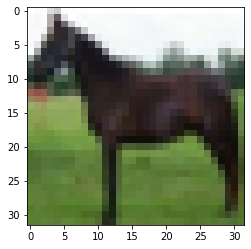

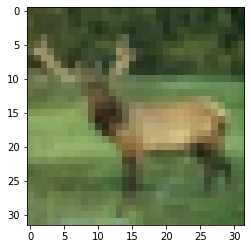

In [12]:
# A picture of a horse
plt.imshow(x_test[9])
plt.show()
# A picture of a deer
plt.imshow(x_test[2])
plt.show()
# save the two examples for later use
pickle.dump((x_test[9], x_test[2]), open('files/ch05/horsedeer.p', 'wb'))

The 10th picture in the testing dataset is a horse, and the 3rd picture in the testing dataset is a deer, as you can see from the pictures above.

### 4.2. Diagrams of the Network and Predictions

We now look under the hood and dive into the model. Specifically, we'll keep all the data in the intermediate steps of the training process. We obtain the weights of the model and the predicted probabilities of the above two pictures being a horse before training. We then again obtain the information after 5 epochs, 10 epochs ... 125 epochs.

In [13]:
# create lists for weights and epochs
ws=[]
bs=[]
epochs=[]
p_horse=[]
p_deer=[]
# record weights before training
w0, bias0 = model.layers[-1].get_weights()
bs.append(bias0[0])
ws.append(w0.reshape(1024,))
epochs.append(0)
# record predictions before training
pred_horse=model.predict(X_test[9].reshape(-1,1024))
pred_deer=model.predict(X_test[2].reshape(-1,1024))
p_horse.append(pred_horse[0,0])
p_deer.append(pred_deer[0,0])

# Train 5 epochs at a time
for i in range(1,26,1):
    model.fit(X_train, y_train, verbose=0, epochs=5)
    # record weights after training
    w, bias = model.layers[-1].get_weights()
    bs.append(bias[0])
    ws.append(w.reshape(1024,))
    epochs.append(i*5)
    # record predictions after training
    pred_horse=model.predict(X_test[9].reshape(-1,1024))
    pred_deer=model.predict(X_test[2].reshape(-1,1024))
    p_horse.append(pred_horse[0,0])
    p_deer.append(pred_deer[0,0])   
    
# save the data for later use
data = (bs, ws, epochs, p_horse, p_deer)
pickle.dump(data, open('files/ch05/p_horse_deer.p', 'wb')) 

1/1 [==============================] - 0s 1ms/step


Next, we plot how the weights and predictions have changed.

In [14]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import pickle
import os

# Load up date during the training process
horse, deer = pickle.load(open('files/ch05/horsedeer.p', 'rb'))
bs, ws, epochs, p_horse, p_deer = \
    pickle.load(open('files/ch05/p_horse_deer.p', 'rb'))   

# Generate 26 pictures
for i in range(26):
    fig = plt.figure(figsize=(14,10), dpi=100)
    ax = fig.add_subplot(111)  
    # Draw the four input neurons
    circle = plt.Circle((-3,4),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    circle = plt.Circle((-3,-4),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    circle = plt.Circle((-3,2),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    circle = plt.Circle((-3,-2),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    # Draw the output neuron
    circle = plt.Circle((1,0),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    # Draw connections between neurons
    xys = [[(0.2,0), (-2.2,2)],
           [(0.2,0), (-2.2,-2)],
           [(-3.8,-2),(-5.5,-2)],
           [(-3.8,2),(-5.5,2)],
           [(-3.8,-4),(-5.5,-4)],
           [(-3.8,4),(-5.5,4)],
           [(0.2,0), (-2.2,4)],
           [(0.2,0), (-2.2,-4)],
           [(4.5,0),(4,0)]]
    for xy in xys:
        ax.annotate("",xy=xy[0],xytext=xy[1],
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 2))  
    # Put explanation texts on the graph
    zs = [[-5.25, 4.1, "bias", 20, "k", 0],
            [-5.25, -3.9, "pixel", 20, "k", 0],
            [-3.2, 3.8, "1", 30, "k", 0],
            [-3.6, -4.2, r"$X_{1024}$", 30, "k", 0],
            [-3.3, 0.2, r"$\vdots$", 30, "k", 0],
            [-3.3, -0.4, r"$\vdots$", 30, "k", 0],
            [-5.25, 2.1, "pixel", 20, "k", 0],
            [-5.25, -1.9, "pixel", 20, "k", 0],        
            [-3.4, 1.8, r"$X_{1}$", 30, "k", 0],
            [-3.6, -2.2, r"$X_{1023}$", 30, "k", 0],
            [0.5, -0.1, "wX+b", 20, "k", 0],
            [4.6, -0.1, f"Y={p_horse[i]:.4f}", 20, "r", 0],
            [2.05, -0.1, r"$\frac{1}{1+e^{-(wX+b)}}$", 25, "k", 0],
            [-1.9, -2, f"w={ws[i][-2]:.3f}", 20, "r",39],
            [-1.7, 2.0, f"b={bs[i]:.3f}", 20,"r",-57],
            [-1.7, -3.5, f"w={ws[i][-1]:.3f}", 20, "r",57],
            [-2.1, 0.9, f"w={ws[i][0]:.3f}", 20,"r",-39]]
    for z in zs:
        plt.text(z[0], z[1], z[2], fontsize=z[3], color=z[4], rotation=z[5])  
    # put epoch number and losses up
    plt.text(1,4, f"epoch {epochs[i]}", fontsize=40, color="g")   
    # add text to explain 
    txt = ax.annotate('Sigmoid\nActivation', 
        xy = (3,-1), 
        xytext = (0.55,0.2), 
        textcoords = 'axes fraction', 
        bbox = dict(boxstyle="round", fc="0.9"), 
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1), 
        fontsize = 20)
    txt = ax.annotate('probability of\n being a horse', 
        xy = (4.8,0.2), 
        xytext = (0.7,0.65), 
        textcoords = 'axes fraction', 
        bbox = dict(boxstyle="round", fc="0.9"), 
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1), 
        fontsize = 20)
    # add rectangle to plot
    ax.add_patch(Rectangle((2,-1), 2, 2,
                 edgecolor = 'k',alpha=0.1))  
    ax.set_xlim(-7, 7)
    ax.set_ylim(-5, 5)
    plt.axis("off")
    # Add horse picture
    newax = fig.add_axes([0.1, 0.4, 0.2, 0.2])
    newax.imshow(horse)
    newax.axis('off')
    plt.savefig(f"files/ch05/p_horse{i}.png")
    plt.close(fig)

You can go to the local folder to see the 26 pictures generated by the program above. For example, if you open the picture p_horse0.png, you'll see the weights of the model, plus the model's prediction on the horse picture, before training starts, as below: 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_horse0.png" />

The picture shows that before training, the model assigns a 34.74% chance that the picture above is a horse. Now, if you look at the picture p_horse25.png, you'll see the weights of the model, plus the model's prediction on the horse picture after 125 epochs of training, as below: 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_horse25.png" />

### 4.3. Animate the Training Process
Better yet, you can create an animation of the training process and see how the predicted probability and the weights have changed during the training process.

In [15]:
import imageio, PIL
import numpy as np
frames=[]

for i in range(26):
    frame=PIL.Image.open(f"files/ch05/p_horse{i}.png")
    frame=np.asarray(frame)
    frames.append(np.array(frame))
imageio.mimsave('files/ch05/p_horse.gif', frames, fps=3)

After running the above code, you'll see a video as follows:
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_horse.gif" />

After 125 epochs of training, the model predicts that there is an 88% chance that the picture is a horse. 

We can also plot how the prediction for the deer changes.

In [16]:

# Generate 26 pictures
for i in range(26):
    fig = plt.figure(figsize=(14,10), dpi=100)
    ax = fig.add_subplot(111)  
    # Draw the four input neurons
    circle = plt.Circle((-3,4),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    circle = plt.Circle((-3,-4),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    circle = plt.Circle((-3,2),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    circle = plt.Circle((-3,-2),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    # Draw the output neuron
    circle = plt.Circle((1,0),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    # Draw connections between neurons
    xys = [[(0.2,0), (-2.2,2)],
           [(0.2,0), (-2.2,-2)],
           [(-3.8,-2),(-5.5,-2)],
           [(-3.8,2),(-5.5,2)],
           [(-3.8,-4),(-5.5,-4)],
           [(-3.8,4),(-5.5,4)],
           [(0.2,0), (-2.2,4)],
           [(0.2,0), (-2.2,-4)],
           [(4.5,0),(4,0)]]
    for xy in xys:
        ax.annotate("",xy=xy[0],xytext=xy[1],
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 2))  
    # Put explanation texts on the graph
    zs = [[-5.25, 4.1, "bias", 20, "k", 0],
            [-5.25, -3.9, "pixel", 20, "k", 0],
            [-3.2, 3.8, "1", 30, "k", 0],
            [-3.6, -4.2, r"$X_{1024}$", 30, "k", 0],
            [-3.3, 0.2, r"$\vdots$", 30, "k", 0],
            [-3.3, -0.4, r"$\vdots$", 30, "k", 0],
            [-5.25, 2.1, "pixel", 20, "k", 0],
            [-5.25, -1.9, "pixel", 20, "k", 0],        
            [-3.4, 1.8, r"$X_{1}$", 30, "k", 0],
            [-3.6, -2.2, r"$X_{1023}$", 30, "k", 0],
            [0.5, -0.1, "wX+b", 20, "k", 0],
            [4.6, -0.1, f"Y={p_deer[i]:.4f}", 20, "r", 0],
            [4.6, -1, f"1-Y={1-p_deer[i]:.4f}", 20, "r", 0],                       
            [2.05, -0.1, r"$\frac{1}{1+e^{-(wX+b)}}$", 25, "k", 0],
            [-1.9, -2, f"w={ws[i][-2]:.3f}", 20, "r",39],
            [-1.7, 2.0, f"b={bs[i]:.3f}", 20,"r",-57],
            [-1.7, -3.5, f"w={ws[i][-1]:.3f}", 20, "r",57],
            [-2.1, 0.9, f"w={ws[i][0]:.3f}", 20,"r",-39]]
    for z in zs:
        plt.text(z[0], z[1], z[2], fontsize=z[3], color=z[4], rotation=z[5])  
    # put epoch number and losses up
    plt.text(1,4, f"epoch {epochs[i]}", fontsize=40, color="g")   
    # add text to explain 
    txt = ax.annotate('Sigmoid\nActivation', 
        xy = (3,1), 
        xytext = (0.7,0.7), 
        textcoords = 'axes fraction', 
        bbox = dict(boxstyle="round", fc="0.9"), 
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1), 
        fontsize = 20)
    txt = ax.annotate('probability of\n being a deer', 
        xy = (5.5,-1), 
        xytext = (0.7,0.15), 
        textcoords = 'axes fraction', 
        bbox = dict(boxstyle="round", fc="0.9"), 
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1), 
        fontsize = 20)
    # add rectangle to plot
    ax.add_patch(Rectangle((2,-1), 2, 2,
                 edgecolor = 'k',alpha=0.1))  
    ax.set_xlim(-7, 7)
    ax.set_ylim(-5, 5)
    plt.axis("off")
    # Add deer picture
    newax = fig.add_axes([0.1, 0.4, 0.2, 0.2])
    newax.imshow(deer)
    newax.axis('off')
    plt.savefig(f"files/ch05/p_deer{i}.png")
    plt.close(fig)



In the picture p_deer0.png, you'll see the weights of the model, plus the model's prediction on the deer picture, before training, as follows: 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_deer0.png" />

The picture shows that before training, the model assigns a 39.76% chance that the picture is a horse. This is equivalent to predicting that the picture is a deer with a 60.24% probability. Now, if you look at the picture p_deer25.png, you'll see the weights of the model, plus the model's prediction on the picture after 125 epochs of training, as follows: 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_deer25.png" />

The model now places a 94.08% probability that the picture is a deer, a very good prediction! 

Better yet, we can create an animation to show the whole process


In [17]:
import imageio, PIL
import numpy as np
frames=[]

for i in range(26):
    frame=PIL.Image.open(f"files/ch05/p_deer{i}.png")
    frame=np.asarray(frame)
    frames.append(np.array(frame))
imageio.mimsave('files/ch05/p_deer.gif', frames, fps=3)

You'll see an animation as follows 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_deer.gif" />

### 4.4. Combine the Animation 

Now we can combine the animation for the horse and deer, and put them side by side for comparison.

In [18]:
import matplotlib
import imageio, PIL
import numpy as np
frames=[]

for i in range(26):
    frame1=PIL.Image.open(f"files/ch05/p_horse{i}.png")
    frame1=np.asarray(frame1)
    frame2=PIL.Image.open(f"files/ch05/p_deer{i}.png")
    frame2=np.asarray(frame2) 
    frame=np.concatenate([frame1, frame2], axis=1)
    frames.append(np.array(frame))
imageio.mimsave('files/ch05/p_horse_deer.gif', frames, fps=3)    

After running it, you'll see an animation as follows
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_horse_deer.gif" />

## 5. Binary Classification with A Deep Neural Network 
Next, we'll add two hidden layers to the neural network with ReLU activations. We'll make predictions on the same dataset using the new network and see its performance. 

In [19]:
import tensorflow as tf
tf.random.set_seed(0)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1024,activation='relu',input_shape=(32*32,)))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy")
model.fit(X_train, y_train, verbose=0, epochs=125)

print(model.summary())
pred_model=model.predict(X_test)
# Convert values between 0 and 1 to Y or N 
pred_yn = np.where(pred_model > 0.5, 1, 0)

ma5=confusion_matrix(y_test,pred_yn) 
print("the confusion matrix is\n", ma5) 

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,pred_yn)
print(f"the accuracy of the prediction is {accuracy}") 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 32)                32800     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,082,433
Trainable params: 1,082,433
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 2ms/step
the confusion matrix is
 [[15  9]
 [ 7 10]]
the accuracy of the prediction is 0.6097560975609756


The above results show that the DNN has an accuracy of 60.98%. 

## Appendix: Load the CIFAR10 Dataset from Tensorflow Directly
You can easily load up the CIFAR10 dataset directly by using the ***tensorflow*** library. Here is how.

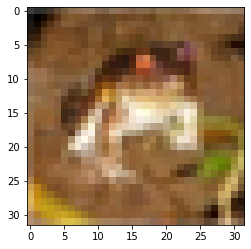

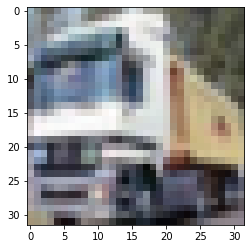

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Look at the first two pictures
pic1=x_train[0]/255
pic2=x_train[1]/255

plt.imshow(pic1)
plt.show()  
plt.imshow(pic2)  
plt.show()


The first picture is a frog, and the second a truck.